# Análise de Dados Para Campanhas de Marketing de Instituições Financeiras

Esse é um exercício focado na limpeza de dados de um dataset oferecido pela DataScienceAcademy (DSA) em seu curso de Análise de Dados com Linguagem Python. A atividade consiste em solucionar diversos problemas do dataset para posteriormente fazer uma simples análise de seus dados. Após resolver os problemas com os conhecimentos que aprendidos durante os capítulos foi possível comparar com a solução fornecida pela equipe da DSA.

### Importando os pacotes necessários

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Carregando os dados

In [2]:
# Carrega o dataset
df = pd.read_csv("D:/Projetos_Analise_de_dados/Limpeza_de_dados/Dados/dataset.csv") 

In [3]:
# Shape
df.shape

(45211, 19)

In [4]:
# Amostra
df.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000.0,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000.0,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000.0,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000.0,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0.0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


## Análise Exploratória

In [5]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45185 non-null  float64
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(2), int64(6), 

In [6]:
# Temos valores nulos? Sim ou não?
df.isna().any()

customerid    False
age            True
salary         True
balance       False
marital       False
jobedu        False
targeted      False
default       False
housing       False
loan          False
contact       False
day           False
month          True
duration      False
campaign      False
pdays         False
previous      False
poutcome      False
response       True
dtype: bool

In [7]:
# Temos valores nulos? Quantos?
df.isna().sum()

customerid     0
age           20
salary        26
balance        0
marital        0
jobedu         0
targeted       0
default        0
housing        0
loan           0
contact        0
day            0
month         50
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
response      30
dtype: int64

Como pode-se observar, as colunas age, salary, month e response apresentam valores nulos.
A coluna customerid representa a chave primária de cada registro do dataset e não será utilizada nas análises, logo será removida.

In [8]:
# Não usaremos a coluna ID. Vamos removê-la.
df.drop(["customerid"], axis = 1, inplace = True)

In [9]:
# Colunas
df.columns

Index(['age', 'salary', 'balance', 'marital', 'jobedu', 'targeted', 'default',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'response'],
      dtype='object')

### Exercício 1: A coluna "jobedu" parece ter duas informações. Vamos separar em duas colunas.

In [10]:
df.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58.0,100000.0,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,44.0,60000.0,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,33.0,120000.0,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,47.0,20000.0,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,33.0,0.0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [11]:
#INSERINDO UMA COLUNA APÓS jobedu PARA RECEBER OS VALORES DE job
df.insert(loc = 5, column = 'job', value = '')

#INSERINDO UMA COLUNA APÓS job PARA RECEBER OS VALORES DE edu
df.insert(loc = 6, column = 'edu', value = '')

#DIVIDINDO A COLUNA jobedu E COMPLETANDO AS DUAS COLUNAS CRIADAS
df[['job', 'edu']] = df['jobedu'].str.split(',', expand = True)

# Drop da coluna "jobedu" 
df.drop(["jobedu"], axis = 1, inplace = True)

In [12]:
df.head()

,age,salary,balance,marital,job,edu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58.0,100000.0,2143,married,management,tertiary,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,44.0,60000.0,29,single,technician,secondary,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,33.0,120000.0,2,married,entrepreneur,secondary,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,47.0,20000.0,1506,married,blue-collar,unknown,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,33.0,0.0,1,single,unknown,unknown,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


### Exercício 2: Tratamento de valores ausentes 

#### Variável Idade

In [13]:
# Valores ausentes no dataframe
df.isna().any()

age          True
salary       True
balance     False
marital     False
job         False
edu         False
targeted    False
default     False
housing     False
loan        False
contact     False
day         False
month        True
duration    False
campaign    False
pdays       False
previous    False
poutcome    False
response     True
dtype: bool

In [14]:
# Valores ausentes da variável age
df.age.isnull().sum()

20

In [15]:
# Calcula o percentual de valores ausentes na variável age
df.age.isnull().mean()*100

0.0442370219636814

Apenas 0,04% dos valores de idade estão ausentes, portando não removeremos a coluna. As opções seriam remover as linhas com registro em branco ou imputar os valores.

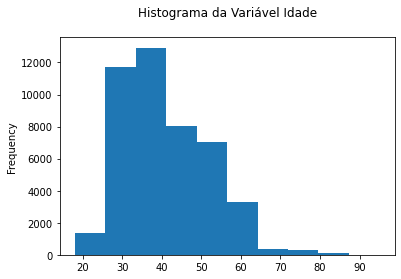

In [16]:
# Histograma
df.age.plot(kind = "hist")
plt.title("Histograma da Variável Idade\n")
plt.show()

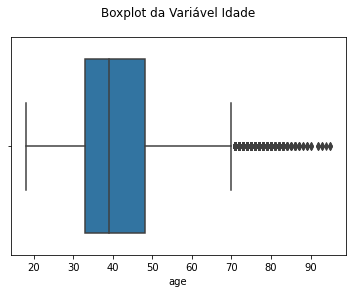

In [17]:
# Boxplot
sns.boxplot(df.age)
plt.title("Boxplot da Variável Idade\n")
plt.show()

In [18]:
# Vamos verificar qual é a média de idade.
df.age.mean()

40.93565090394105

In [19]:
# Vamos verificar qual é a mediana, valor do meio da distribuição quando os dados estão ordenados.
df.age.median()

39.0

In [20]:
# Vamos verificar qual é a moda, o valor que aparece com mais frequência.
df.age.mode()

0    32.0
Name: age, dtype: float64

Como existem vários outliers, decidi usar a moda como o valor imputado ao invés da média e da mediana. A média é muito sensível aos extremos, portanto não é a melhor opção. A mediana também seria viável.

In [21]:
# Preenchendo com a moda
df.age.fillna("32", inplace = True)

In [22]:
# Agora convertemos para int
df.age = df.age.astype("int")
df.age.dtypes

dtype('int32')

In [23]:
# Média
df.age.mean()

40.93169803808808

In [24]:
# Mediana
df.age.median()

39.0

In [25]:
# Valores ausentes da variável age
df.age.isnull().sum()

0

In [26]:
# Percentual de valores ausentes
df.age.isnull().mean()*100

0.0

Como pode-se observar, os valores da média e mediana não se alteraram significativamente.

#### Variável mês

In [27]:
# Valores ausentes no dataframe
df.isna().any()

age         False
salary       True
balance     False
marital     False
job         False
edu         False
targeted    False
default     False
housing     False
loan        False
contact     False
day         False
month        True
duration    False
campaign    False
pdays       False
previous    False
poutcome    False
response     True
dtype: bool

In [28]:
# Valores ausentes na variável
df.month.isnull().sum()

50

In [29]:
# Percentual de valores ausentes
df.month.isnull().mean()*100

0.11059255490920351

Como apenas 0,11% dos registros são nulos não vale a pena deletar a coluna. Da mesma forma que a variável anterior, pode-se excluir os linhas com a variável em branco ou imputar os valores.

In [30]:
# Tipo da variável
df.month.dtypes

dtype('O')

In [31]:
# Categorias da variável
df.month.value_counts()

may, 2017    13747
jul, 2017     6888
aug, 2017     6240
jun, 2017     5335
nov, 2017     3968
apr, 2017     2931
feb, 2017     2646
jan, 2017     1402
oct, 2017      738
sep, 2017      576
mar, 2017      476
dec, 2017      214
Name: month, dtype: int64

Nessa situação, também imputou-se os valores em branco pela moda (não é possível imputar com a média ou mediana, pois a variável é do tipo 'object'). Outra opção seria imputar com algum outro valor como 'Outro'.

In [32]:
# Moda
df.month.mode()

0    may, 2017
Name: month, dtype: object

In [33]:
# Imputação com a moda
df.month.fillna("may, 2017", inplace = True)

In [34]:
# Valores ausentes na variável
df.month.isnull().sum()

0

In [35]:
# Percentual de valores ausentes
df.month.isnull().mean()*100

0.0

#### Variável salário

In [36]:
# Valores ausentes na variável
df.salary.isnull().sum()

26

In [37]:
# Calcula o percentual de valores ausentes na variável salary
df.salary.isnull().mean()*100

0.05750812855278583

Apenas 0,06% dos valores estão ausentes. Então não é recomendável excluir a coluna toda e sim excluir os registros em branco ou imputar os valores.

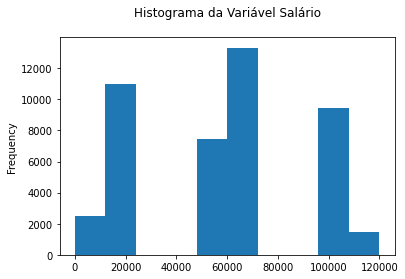

In [38]:
# Histograma
df.salary.plot(kind = "hist")
plt.title("Histograma da Variável Salário\n")
plt.show()

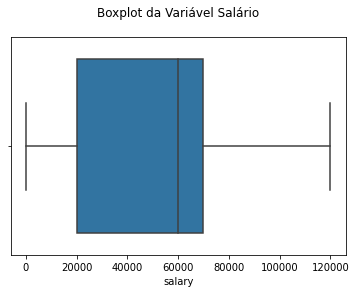

In [39]:
# Boxplot
sns.boxplot(df.salary)
plt.title("Boxplot da Variável Salário\n")
plt.show()

In [40]:
# Vamos verificar qual é a média de idade.
df.salary.mean()

57008.65331415293

In [41]:
# Vamos verificar qual é a mediana.
df.salary.median()

60000.0

In [42]:
# Vamos verificar qual é a moda.
df.salary.mode()

0    20000.0
Name: salary, dtype: float64

Imputando a mediana para os valores nulos de salário, pois como os dados não são simétricos não é interessante imputar a média.

In [43]:
# Preenchendo os valores nulos com a moda
df.salary.fillna("60000", inplace = True)

In [44]:
# Tipo da variável
df.salary.dtypes

dtype('O')

In [45]:
# Convertemos para o tipo float
df.salary = df.salary.astype("float")
df.salary.dtypes

dtype('float64')

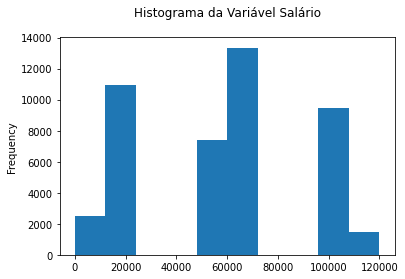

In [46]:
# Histograma
df.salary.plot(kind = "hist")
plt.title("Histograma da Variável Salário\n")
plt.show()

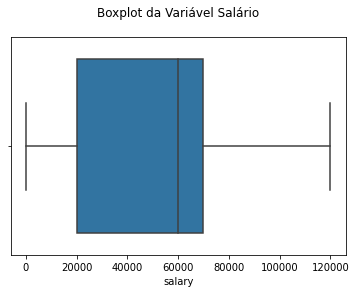

In [47]:
# Boxplot
sns.boxplot(df.salary)
plt.title("Boxplot da Variável Salário\n")
plt.show()

In [48]:
# Registros para cada salário
df.salary.value_counts()

20000.0     9725
100000.0    9454
60000.0     9195
50000.0     5167
70000.0     4153
55000.0     2264
120000.0    1486
8000.0      1303
16000.0     1239
4000.0       937
0.0          288
Name: salary, dtype: int64

É interessante observar que existem salários com valores zero. É incomum alguém receber 0 como salário, portanto, bem provavel que isso seja um problema nos dados. Os valores zero para salário serão imputados com a mediana também.

In [49]:
# Replace do zero pela mediana
df['salary'] = df['salary'].replace(0, 60000)

In [50]:
# Registros para cada salário
df.salary.value_counts()

20000.0     9725
60000.0     9483
100000.0    9454
50000.0     5167
70000.0     4153
55000.0     2264
120000.0    1486
8000.0      1303
16000.0     1239
4000.0       937
Name: salary, dtype: int64

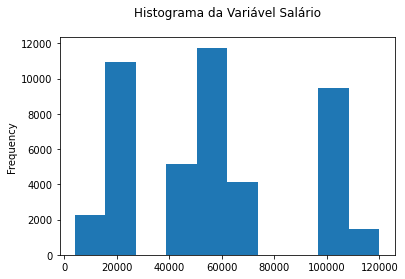

In [51]:
# Histograma
df.salary.plot(kind = "hist")
plt.title("Histograma da Variável Salário\n")
plt.show()

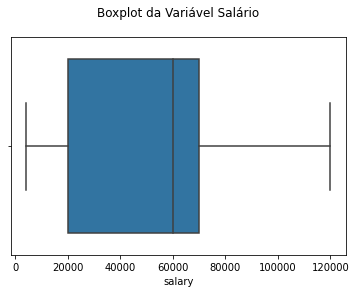

In [52]:
# Boxplot
sns.boxplot(df.salary)
plt.title("Boxplot da Variável Salário\n")
plt.show()

In [53]:
# Calcula o percentual de valores ausentes na variável salary
df.salary.isnull().mean()*100

0.0

#### Variável response (variável alvo) 

In [54]:
# Valores ausentes
df.response.isnull().sum()

30

In [55]:
# Calcula o percentual
df.response.isnull().mean()*100

0.0663555329455221

Apenas 0,07% dos registros estão ausentes, então não é uma boa estratégia remover a coluna. As alternativas seriam remover os registros em branco ou imputar os valores. Como essa é a variável alvo, decidi remover as linhas em branco, pois a imputação sempre modifica os dados e modificar a variável alvo não é uma boa opção.

In [56]:
# Dropando os registros
df.dropna(subset = ["response"], inplace = True)

In [57]:
# Verifca valores NA
df.isnull().sum()

age         0
salary      0
balance     0
marital     0
job         0
edu         0
targeted    0
default     0
housing     0
loan        0
contact     0
day         0
month       0
duration    0
campaign    0
pdays       0
previous    0
poutcome    0
response    0
dtype: int64

Aparentemente não restam registros nulos, porém, pode existir falta de informação em alguma das variáveis, mesmo que esses valores não estejam apresentados como nulos.

#### Variável pdays

In [58]:
# Valores ausentes
df.pdays.isnull().sum()

0

In [59]:
# Describe
df.pdays.describe()

count    45181.000000
mean        40.198601
std        100.134050
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

Como pode-se observar não há valores nulos, porém o valor -1 é descreve falta de informação nessa coluna. 

In [60]:
# Vamos fazer relace de -1 por NaN
df.pdays = df.pdays.replace({-1.0:np.NaN})

In [61]:
# Valores ausentes
df.isnull().sum()

age             0
salary          0
balance         0
marital         0
job             0
edu             0
targeted        0
default         0
housing         0
loan            0
contact         0
day             0
month           0
duration        0
campaign        0
pdays       36930
previous        0
poutcome        0
response        0
dtype: int64

In [62]:
# Calcula o percentual
df.pdays.isnull().mean()*100

81.73789867422147

81,74% dos dados dessa coluna estão em branco, logo, uma boa opção é remover essa coluna que tem mais dados faltantes do que existentes.

In [63]:
# Drop da coluna "pdays" pois tem mais de 80% dos valores ausentes
df.drop(["pdays"], axis = 1, inplace = True)

In [64]:
# Valores ausentes
df.isnull().sum()

age         0
salary      0
balance     0
marital     0
job         0
edu         0
targeted    0
default     0
housing     0
loan        0
contact     0
day         0
month       0
duration    0
campaign    0
previous    0
poutcome    0
response    0
dtype: int64

Após essas modificações o dataset se contra limpo e algumas análises foram propostas pela DSA.

## Exportando os dados limpos 

In [65]:
df.to_csv('D:/Projetos_Analise_de_dados/Limpeza_de_dados/Dados/dataset_limpo.csv', index=False)

## Conclusão e Análise dos Dados

### Análise Univariada

#### Variável Marital 

In [66]:
# Proporção da variável de estado civil
df.marital.value_counts(normalize = True)

married     0.601912
single      0.282907
divorced    0.115181
Name: marital, dtype: float64

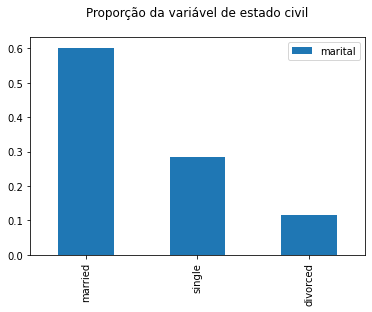

In [67]:
# Plot
df.marital.value_counts(normalize = True).plot(kind = "bar")
plt.title("Proporção da variável de estado civil\n")
plt.legend()
plt.show()

#### Variável Job

In [68]:
# Proporção da variável de job
df.job.value_counts(normalize = True)

blue-collar      0.215290
management       0.209247
technician       0.168035
admin.           0.114340
services         0.091853
retired          0.050087
self-employed    0.034860
entrepreneur     0.032890
unemployed       0.028840
housemaid        0.027423
student          0.020761
unknown          0.006374
Name: job, dtype: float64

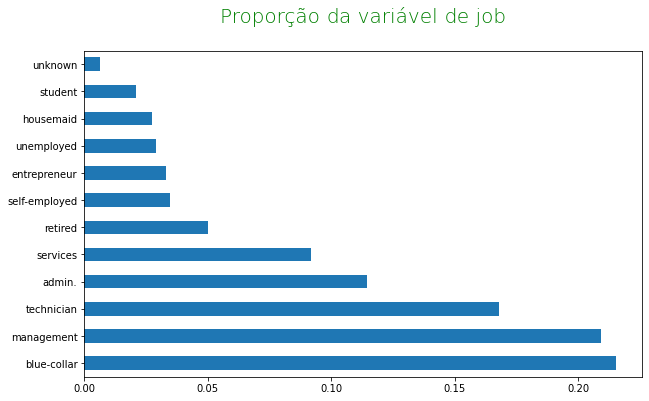

In [69]:
# Plot
plt.figure(figsize = (10,6))
df.job.value_counts(normalize = True).plot(kind = "barh")
plt.title("Proporção da variável de job\n", fontdict = {'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

#### Variável Edu

In [70]:
# Proporção da variável de education
df.edu.value_counts(normalize = True)

secondary    0.513247
tertiary     0.294194
primary      0.151480
unknown      0.041079
Name: edu, dtype: float64

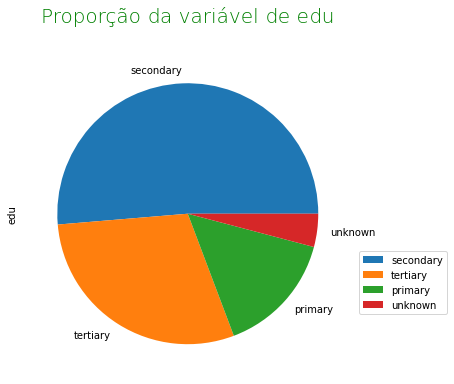

In [71]:
# Plot
plt.figure(figsize = (10,6))
df.edu.value_counts(normalize = True).plot(kind = "pie")
plt.title("Proporção da variável de edu\n", fontdict = {'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.legend()
plt.legend(bbox_to_anchor=(1.31,0.4))
plt.show()

#### Variável response

In [72]:
# Proporção da variável response
df.response.value_counts(normalize = True)

no     0.882982
yes    0.117018
Name: response, dtype: float64

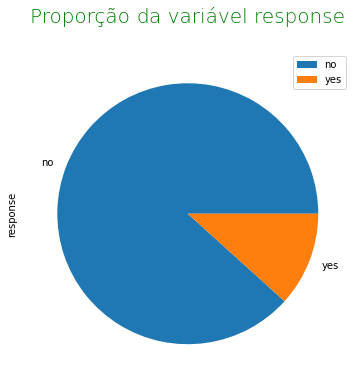

In [73]:
# Plot
plt.figure(figsize = (10,6))
df.response.value_counts(normalize = True).plot(kind = "pie")
plt.title("Proporção da variável response\n", fontdict = {'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.legend()
plt.show()

## Análise Multivariada

#### Variáveis balance x salary

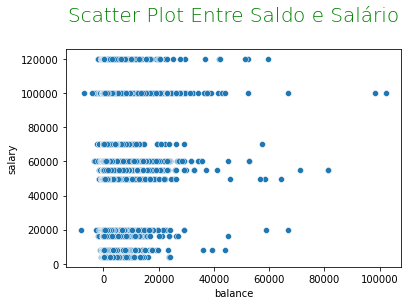

In [74]:
# Scatter Plot
sns.scatterplot(df["balance"], df["salary"])
plt.title("Scatter Plot Entre Saldo e Salário\n", fontdict = {'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

#### Variáveis balance x age

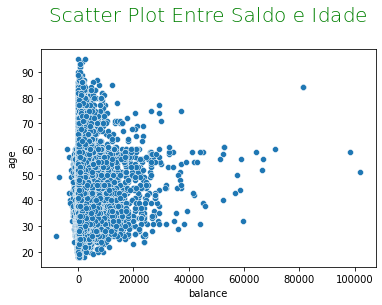

In [75]:
# Scatter Plot
sns.scatterplot(df["balance"], df["age"])
plt.title("Scatter Plot Entre Saldo e Idade\n", fontdict = {'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

#### Variáveis salary x balance x age 

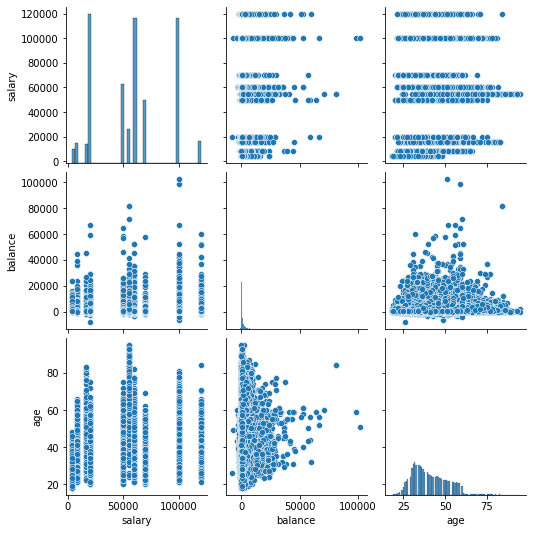

In [76]:
# Pair Plot
sns.pairplot(df[["salary","balance","age"]])
plt.show()

#### Correlação entre variáveis  salary, balance e age

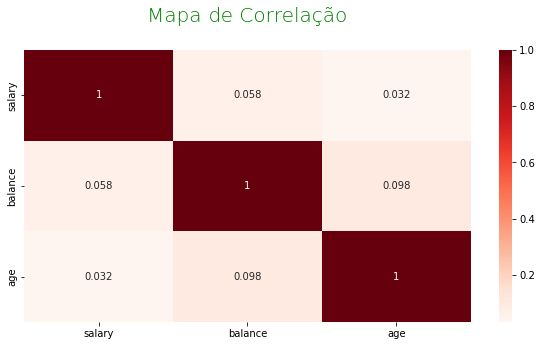

In [77]:
# Calcula a correlação
res = df[["salary", "balance", "age"]].corr()

# Mapa de Correlação
plt.figure(figsize = (10,5))
sns.heatmap(res, annot = True, cmap = "Reds")
plt.title("Mapa de Correlação\n", fontdict = {'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

Todas as correlações são fracas.